<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 8 - SVM
###Ojasa Chitre


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

Code for plotting Support Vector

In [ ]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  # finding range of x
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  # print(x_min,x_max)
  # finding range of y
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
  # creating meshgrid for x and y
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  # reshaping z to match xx
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1')
  plt.ylabel('X2') 
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

Text(0, 0.5, 'X2')

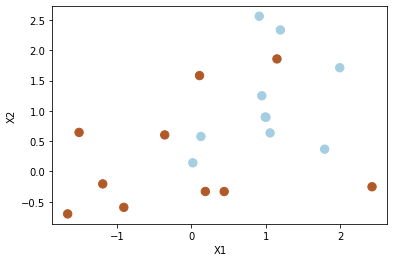

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

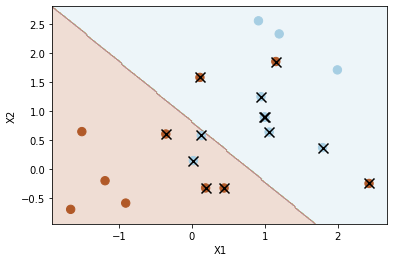

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

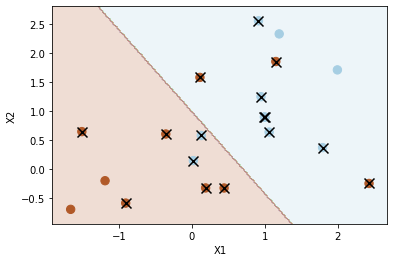

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation

tuned_parameters = [{'C': [0.0001,0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring= 'accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.score(X,y)

0.8

In [ ]:
clf.best_params_

{'C': 0.0001}

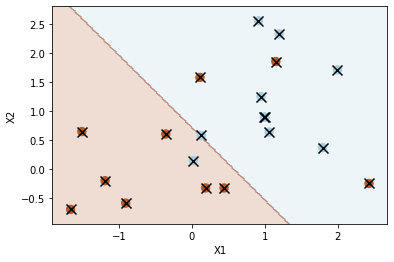

Number of support vectors:  20


In [ ]:
svc2 = SVC(C=0.0001, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [ ]:
np.random.seed(1)

X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)

X_test[y_test == 1] = X_test[y_test == 1] -1

In [ ]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


Text(0, 0.5, 'X2')

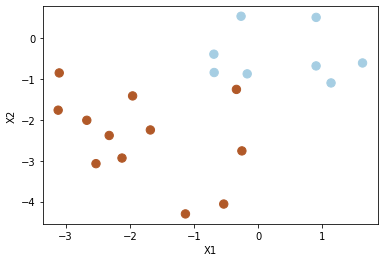

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

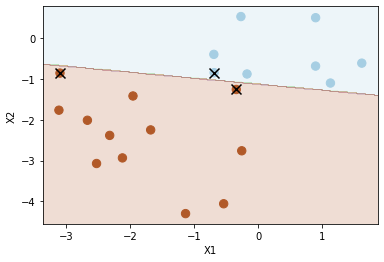

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

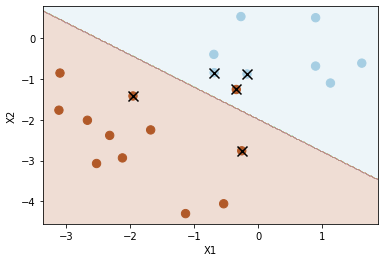

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

## Non-linear kernel

In [ ]:
from sklearn.model_selection import train_test_split 
np.random.seed(8)

X = np.random.randn(200,2)

X[:100] = X[:100] +2

X[101:150] = X[101:150] -2

y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

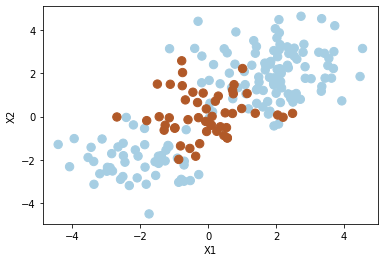

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state = 42)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

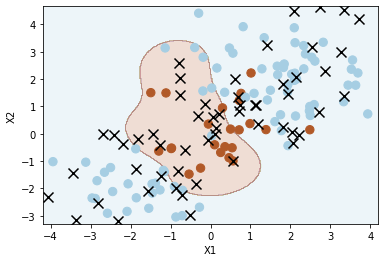

Number of support vectors:  59


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)

plot_svc(svm, X_test, y_test)

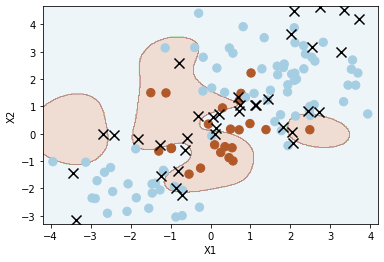

Number of support vectors:  40


In [ ]:
# Increasing C parameter, allowing more flexibility 
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)

plot_svc(svm2, X_test, y_test)

RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. 

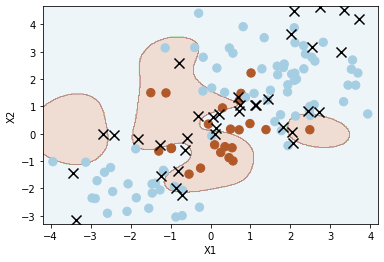

Number of support vectors:  40
[[68  9]
 [11 12]]
0.8


In [ ]:
plot_svc(svm2, X_test, y_test) 
print(confusion_matrix(y_test, svm2.predict(X_test))) 
print(svm2.score(X_test, y_test))

In [ ]:
y_train_pred = svm2.predict(X_train)
y_test_pred = svm2.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

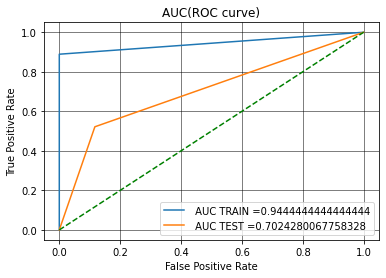

In [ ]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

##Pulsar Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab8/pulsar_data_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab8/pulsar_data_test.csv")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


###Imputing nan values

In [ ]:
train_data.fillna(method="ffill",inplace=True)
test_data.fillna(method="ffill",inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     5370 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        5370 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5370 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [ ]:
train_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,22.362553,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,29.308266,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


###Checking and removing outliers

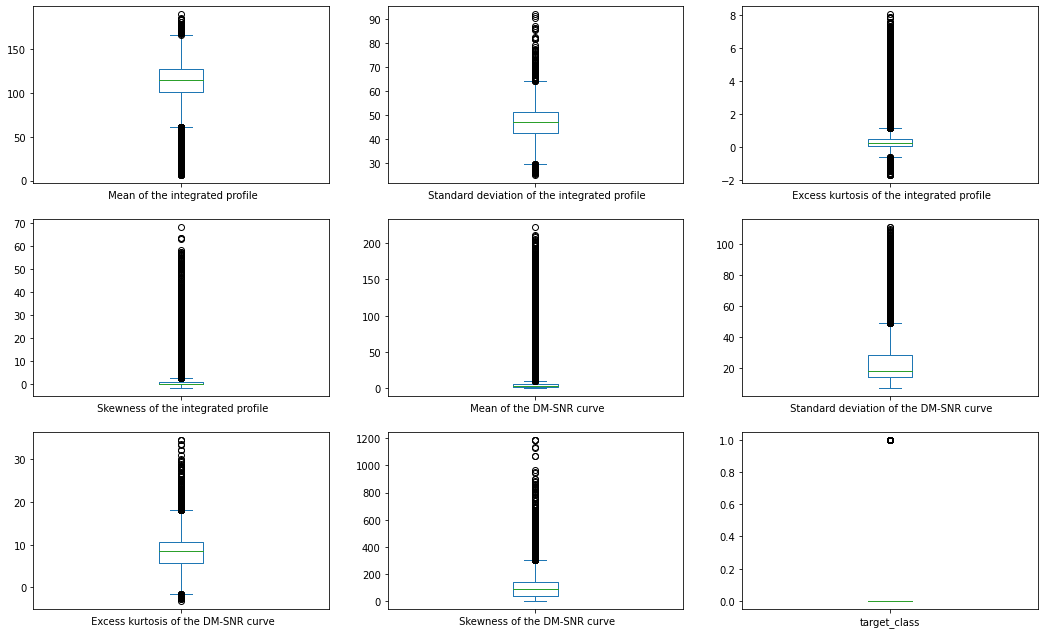

In [ ]:
train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

In [ ]:
def iqr_capping (data, coloumns, factor): # Factor = 1.5
        
    for col in coloumns:
        
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper_bound = Q3 + (factor * IQR)
        lower_bound = Q1 - (factor * IQR)

        data[col]=np.where(data[col]>upper_bound, upper_bound,np.where(data[col]<lower_bound, lower_bound, data[col]))

In [ ]:
outliers = np.unique(iqr_capping(train_data, train_data.loc[:,:' Skewness of the DM-SNR curve'].columns , 1.5))

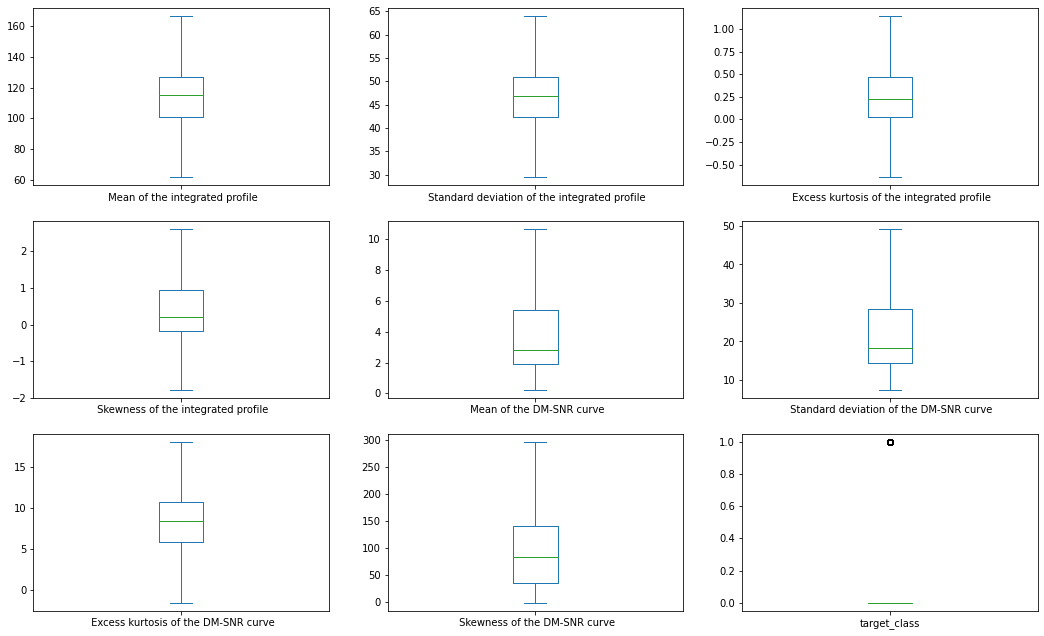

In [ ]:
train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

In [ ]:
x= train_data.drop('target_class', axis = 1).values
y= train_data['target_class'].values
y.shape

(12528,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20 , random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve , roc_auc_score,plot_roc_curve, plot_confusion_matrix
from sklearn.svm import SVC
svm = SVC()
from sklearn.model_selection import cross_val_score

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)

print('Accuracy Score of Super Vector Machine, RBF kernel: ', accuracy_score(y_test, svm_rbf_pred))

Accuracy Score of Super Vector Machine, RBF kernel:  0.9708699122106943


In [ ]:
import seaborn as sns

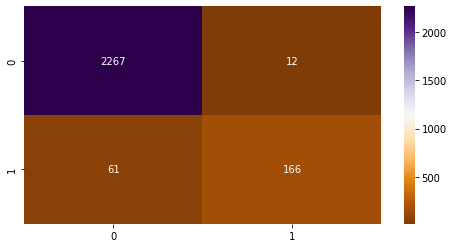

In [ ]:
matrix = confusion_matrix(y_test, svm_rbf_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

In [ ]:
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)

print('Accuracy Score of Super Vector Machine, Linear kernel: ', accuracy_score(y_test, svm_linear_pred))

Accuracy Score of Super Vector Machine, Linear kernel:  0.9772545889864326


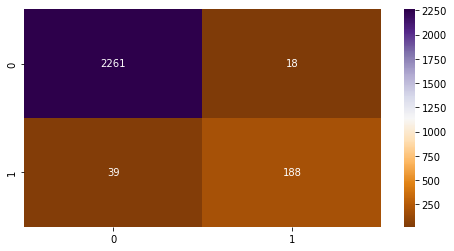

In [ ]:
matrix = confusion_matrix(y_test, svm_linear_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

##Conclusion:
I was able to understand how SVM works. I was able to understand how the hyper parameters can be tweaked to make the performance better. SVM can use multiple kernels, depending on the data different kernels will perform better. In the example I took since the data was not linear, linear kernel didn't perform so well. In the 2nd data since the data was grouped more radially rbf performed better.